# One Way ANOVAs in Python

A One-Way ANOVA ("analysis of variance") compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

Here we will test 4 dimensions of 3 flowers to determine if they come from the same popuation.

Remember results just tell you if there is a difference at all between the groups, post-hoc t-tests are needed to identify which differ.

In [ ]:
### Uncomment this cell and run the code below if you need to install scikit_posthocs
#!pip install scikit_posthocs

In [2]:
# Import packages
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scikit_posthocs import posthoc_ttest

In [3]:
pd.set_option('precision', 3)

In [4]:
# Load data
df = sns.load_dataset('iris')

In [5]:
# View data
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Get list of flower types
flower_types = list(df.species.unique())
flower_types

['setosa', 'versicolor', 'virginica']

In [7]:
# List of feature columns
cols_to_run = df.columns.drop('species')
cols_to_run

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

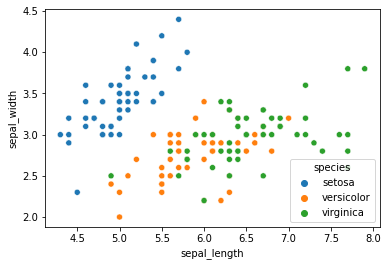

In [8]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

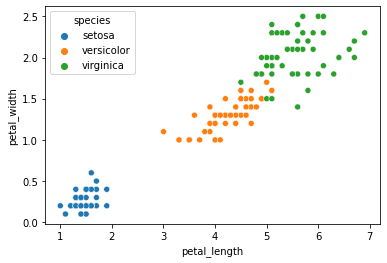

In [9]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")

<AxesSubplot:xlabel='species'>

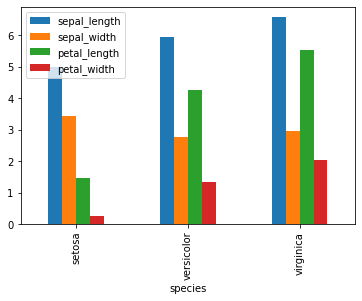

In [10]:
gby = df.groupby('species')[cols_to_run].mean()
gby.plot(kind='bar')

In [11]:
# Start by testing one column-Sepal Length
setosa = df[df['species']=='setosa']['sepal_length']
versicolor = df[df['species']=='versicolor']['sepal_length']
virginica = df[df['species']=='virginica']['sepal_length']

In [12]:
# Run one way anova
f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

Returns a test statistic and a p-value

In [13]:
# List all columns
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
# Select columns to run
cols_to_run = df.columns.drop('species')
cols_to_run

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [15]:
# Use for loop to iterate over the columns and run a one way anova on each
for col in cols_to_run:
    print(col)
    setosa = df[df['species']=='setosa'][col]
    versicolor = df[df['species']=='versicolor'][col]
    virginica = df[df['species']=='virginica'][col]
    print(f_oneway(setosa, versicolor, virginica))
    print('\n')

sepal_length
F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)


sepal_width
F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)


petal_length
F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)


petal_width
F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)




# Can also run multiple analyses at once

In [16]:
setosa = df[df['species']=='setosa'][cols_to_run]
versicolor = df[df['species']=='versicolor'][cols_to_run]
virginica = df[df['species']=='virginica'][cols_to_run]

In [18]:
stats, pvals = f_oneway(setosa, versicolor, virginica)

In [19]:
for col, stat, pval in zip(cols_to_run, stats, pvals):
    print(f'For the column of {col}, the stat was {stat:.2f} with a p-value of {pval:.3f}')

For the column of sepal_length, the stat was 119.26 with a p-value of 0.000
For the column of sepal_width, the stat was 49.16 with a p-value of 0.000
For the column of petal_length, the stat was 1180.16 with a p-value of 0.000
For the column of petal_width, the stat was 960.01 with a p-value of 0.000


In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
cols_to_run

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [22]:
for col in cols_to_run:
    melted = pd.melt(df, id_vars=['species'], value_vars=[col])
    print(col)
    print(posthoc_ttest(melted, val_col='value', group_col='species', sort=True).round(5))
    print('\n')

sepal_length
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0


sepal_width
            setosa  versicolor  virginica
setosa         1.0       0.000      0.000
versicolor     0.0       1.000      0.002
virginica      0.0       0.002      1.000


petal_length
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0


petal_width
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0




In [23]:
ttest_ind(setosa, versicolor)

Ttest_indResult(statistic=array([-10.52098627,   9.45497585, -39.49271939, -34.08034154]), pvalue=array([8.98523504e-18, 1.84525995e-15, 5.40491051e-62, 3.83109539e-56]))

In [24]:
ttest_ind(setosa, virginica)

Ttest_indResult(statistic=array([-15.38619582,   6.45034909, -49.98618626, -42.78579752]), pvalue=array([6.89254606e-28, 4.24635538e-09, 1.50480070e-71, 3.23037482e-65]))

In [25]:
ttest_ind(versicolor, virginica)

Ttest_indResult(statistic=array([ -5.62916526,  -3.20576075, -12.60377944, -14.62536705]), pvalue=array([1.72485630e-07, 1.81910042e-03, 3.17881955e-22, 2.23040907e-26]))

# NOTE: There should be a p-value penalty applied for multiple comparisons

In [26]:
for col in cols_to_run:
    melted = pd.melt(df, id_vars=['species'], value_vars=[col])
    print(col)
    print(posthoc_ttest(melted, val_col='value', group_col='species', sort=True, p_adjust='bonferroni').round(5))
    print('\n')

sepal_length
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0


sepal_width
            setosa  versicolor  virginica
setosa         1.0       0.000      0.000
versicolor     0.0       1.000      0.005
virginica      0.0       0.005      1.000


petal_length
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0


petal_width
            setosa  versicolor  virginica
setosa         1.0         0.0        0.0
versicolor     0.0         1.0        0.0
virginica      0.0         0.0        1.0


